# Independent Boson Results, $\alpha = 0.3$
_________________________________________

### Simulation parameters
The Hamiltonian of the system is the spin-boson Hamiltonian defined by:
$$
H =  \frac{\Delta}{2}\sigma_x +  \frac{\sigma_x}{2} \otimes \sum_k g_k(b_k^\dagger+b_k) + \sum_k \omega_k b_k^\dagger b_k. 
$$
The spectral density function $J$ is defined as:
$$
J(\omega) = 2 \alpha \omega \Big(\frac{\omega}{\omega_c}\Big)^{s-1}\theta(\omega - \omega_c),
$$
where the cutoff frequency is set to $\omega_c=1$. For different values of $s$, the value of $\alpha$ has been rescaled in the following way: 
$$\alpha(s) = \frac{\alpha}{\omega_0^s}$$

There exists a unitary transformation that defines a chain mapping of this Hamiltonian from a star configuation to a chain configuration. Such a mapping is characterized by a set of coefficients, that are computed using standard integration techniques. Using the T-TEDOPA chain mapping it is possible to perform simulations at finite temperature, where the temperature effects are absorbed in the thermal spectral density:
$$
J(\omega, \beta) = \text{sign}(\omega) \frac{J(|\omega|)}{2} \Big( 1+ \coth\Big(\frac{\omega \beta}{2}\Big)\Big).
$$

NB: the rescaled $\alpha(s)$ affects the chain mapping, that has to be modified accordingly.

The simulations of the dynamics are performed using MPS methods, and in particular the `DTDVP` algorithm. 

### Data analysis parameters
To fit the evolution in time of the mean values of the Pauli operators, the following function was used:  
$$
a e^\Gamma + c.
$$
The expected relation for relaxation time $T_1$, dephasing time $T_2$ and pure dephasing time $T^*$ is:  
$$
\frac{1}{T_2} = \frac{1}{2 T_1} + \frac{1}{T^*}
$$

In [2]:
import h5py
import numpy as np
#import cmath for complex number operations
import cmath
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.style as style 
import matplotlib.pyplot as pl

from scipy.optimize import curve_fit
style.use('tableau-colorblind10')
matplotlib.rcParams.update({'font.size': 12})

In [5]:
path = "/home/berkane/Documents/stage/simulations/"

# to work from home
#path = "/home/angela/Documents/stage/simulations/"

# Results for alpha_lit=0.3
sx_res = h5py.File(path+"IBM_sx/extended_results.jld", "r")
sz_res = h5py.File(path+"IBM_sz/extended_results.jld", "r")
sx_ana = h5py.File(path+"IBM_sx/analytical_results.jld", "r")

N = 120
M = 700
beta = ["2.0", "20.0", "200.0", "2000.0"]
sss = ["0.5", "1.0", "2.0", "3.0"]
#smin = ["1.0", "2.0", "3.0", "4.0", "5.0"]
s = ["3.0"]

times = ["10.0", "50.0", "80.0", "100.0"]

tem = ["10", "50", "80", "100"]
#times = ["10", "50", "80", "100"]

OSError: Unable to open file (unable to open file: name = '/home/berkane/Documents/stage/simulations/IBM_sx/extended_results.jld', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
#list(sx_res["2.0/3.0"].keys())
list(sx_res["2.0/3.0"].keys())

['bond_dims',
 'bond_dims_1',
 'bond_dims_2',
 'bond_dims_3',
 'bond_dims_4',
 'chain_occup_1',
 'chain_occup_2',
 'chain_occup_3',
 'chain_occup_4',
 'coeff_c',
 'coeff_e',
 'coeff_t',
 'constr_matr_1',
 'constr_matr_2',
 'constr_matr_3',
 'constr_matr_4',
 'corr_constr_1',
 'corr_constr_2',
 'corr_constr_3',
 'corr_constr_4',
 'corr_destr_1',
 'corr_destr_2',
 'corr_destr_3',
 'corr_destr_4',
 'destr_matr_1',
 'destr_matr_2',
 'destr_matr_3',
 'destr_matr_4',
 'mean_constr_1',
 'mean_constr_2',
 'mean_constr_3',
 'mean_constr_4',
 'mean_destr_1',
 'mean_destr_2',
 'mean_destr_3',
 'mean_destr_4',
 'occup_1',
 'occup_2',
 'occup_3',
 'occup_4',
 'omega',
 'pair_matr_constr_1',
 'pair_matr_constr_2',
 'pair_matr_constr_3',
 'pair_matr_constr_4',
 'pair_matr_destr_1',
 'pair_matr_destr_2',
 'pair_matr_destr_3',
 'pair_matr_destr_4',
 'sx',
 'sz',
 'times']

In [4]:
def corrs(res, b, s, bos, save):
    om=res[b+"/"+s+"/omega"][()]
    occup=[res[b+"/"+s+"/occup_1"][()], res[b+"/"+s+"/occup_2"][()], res[b+"/"+s+"/occup_3"][()], res[b+"/"+s+"/occup_4"][()]]
    chain=[res[b+"/"+s+"/chain_occup_1"][()], res[b+"/"+s+"/chain_occup_2"][()], res[b+"/"+s+"/chain_occup_3"][()], res[b+"/"+s+"/chain_occup_4"][()]]
    
    
    if save: f = pl.figure(figsize=(20.625,5))
    else: f  = pl.figure(figsize=(33,8))
    corrs = np.abs(res[b+"/"+s+"/pair_matr_"+bos+"_4"])
    
    alphas = 0.01/(0.2)**float(s)
    om0 = 0.2*(0.2)**(alphas/(1-alphas))
    
    pl.subplot(1, 3, 1)
    #add vmin=0, vmax=1 
    pl.imshow(corrs, cmap='hot', interpolation='nearest', extent=[om[0], om[M-1], om[M-1], om[0]])
    pl.xlabel(r"$\omega$")
    pl.ylabel(r"$\omega$")
    pl.colorbar()
    if save!=True:
        if bos=="constr": pl.title(r"$\omega_c t = 100$"+r"$, \quad \langle a_\omega^\dagger a_{-\omega}^\dagger \rangle - \langle a_\omega^\dagger \rangle \langle a_{-\omega}^\dagger \rangle $", fontsize=18)
        else: pl.title(r"$\omega_c t = 100$"+r"$, \quad \langle a_\omega a_{-\omega} \rangle - \langle a_\omega \rangle \langle a_{-\omega} \rangle $", fontsize=18)
    else: pl.title(r"$(a)$", x=0.05)

    
    ax = pl.subplot(1, 3, 2)
    for t in range(len(tem)):
        pl.plot(om, occup[t], label=r'$\omega_c t = $'+tem[t])
    pl.axvline(x=0.2, color='black', linewidth=0.8,linestyle='--', label = r'$\pm \epsilon = 0.2 \omega_c$')
    pl.axvline(x=-0.2, color='black', linewidth=0.8,linestyle='--')
    #pl.axvline(x=om0, linewidth=1.2,linestyle='--', label = 'Silbey&Harris')
    #pl.axvline(x=-om0, linewidth=1.2,linestyle='--')
    pl.xlabel(r'$\omega$', fontsize=16)
    pl.ylabel(r'$\langle n_\omega \rangle$', fontsize=16, rotation=0)
    ax.yaxis.set_label_coords(-.05, 1.)
    pl.legend()
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    else: pl.title(r"$(b)$", x=0.05)
        
        
    pl.subplot(1, 3, 3) 
    sites = []
    for i in range(1,N+1) : sites.append(i)

    for t in range(len(tem)):
        pl.plot(sites, chain[t], '-o', label=r'$\omega_c t = $'+tem[t])
    pl.xlabel(r'$i$, chain sites', fontsize=16)
    pl.ylabel(r'$\langle n_i \rangle$', fontsize=16)
    pl.legend()
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    else: pl.title(r"$(c)$", x=0.05)
    
    if res==sz_res: 
        if save: f.savefig("plots/corrs_IBM_sz_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
        else: pl.suptitle(r'$\beta = $' + b+", " + r"$\quad |\psi_0 \rangle = |1 \rangle$ ", fontsize=18)
    elif res==sx_res: 
        if save: f.savefig("plots/corrs_IBM_sx_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
        else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sx_strong: 
        if save: f.savefig("plots/corrs_sx_strong_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
        else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sz_strong: 
        if save: f.savefig("plots/corrs_sz_strong_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
        else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sz_s3:
        if save: f.savefig("plots/corrs_sz_s3_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
        else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    pl.show()
    
 

SyntaxError: invalid syntax (<ipython-input-4-0445b4cc1559>, line 1)

In [5]:
for b in beta:
    corrs(sz_res, b, "3.0", "constr", False)
    corrs(sx_res, b, "3.0", "constr", False)

NameError: name 'corrs' is not defined

In [6]:
corrs(sz_res, "2.0", "3.0", "constr", True)
corrs(sx_res, "2.0", "3.0", "constr", True)
corrs(sx_res, "20.0", "3.0", "constr", True)

NameError: name 'corrs' is not defined

In [7]:
def temp(res, bet, s, bos, save):
    om=[res[b+"/"+s+"/omega"][()] for b in bet]
    occup=[res[b+"/"+s+"/occup_4"][()] for b in bet]
    chain=[res[b+"/"+s+"/chain_occup_4"][()] for b in bet]
    
    
    if save: f = pl.figure(figsize=(20,5))
    else: f  = pl.figure(figsize=(20,5))
    
    ax = pl.subplot(1, 2, 1)
    for b in range(len(bet)):
        pl.plot(om[b], occup[b], label=r'$\beta = $'+bet[b])
    pl.axvline(x=0.2, color='black', linewidth=0.8,linestyle='--', label = r'$\pm \epsilon = 0.2 \omega_c$')
    pl.axvline(x=-0.2, color='black', linewidth=0.8,linestyle='--')
    pl.xlabel(r'$\omega$', fontsize=16)
    pl.ylabel(r'$\langle n_\omega \rangle$', fontsize=16)
    pl.legend()
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    else: pl.title(r"$(a)$", x=0.05)
        
        
    pl.subplot(1,2,2) 
    sites = []
    for i in range(1,N+1) : sites.append(i)

    for b in range(len(bet)):
        pl.plot(sites, chain[b], '-o', label=r'$\beta = $'+bet[b])
    pl.xlabel(r'$i$, chain sites', fontsize=16)
    pl.ylabel(r'$\langle n_i \rangle$', fontsize=16)
    pl.legend()
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    else: pl.title(r"$(b)$", x=0.05)
    
    if res==sz_res: 
        if save: f.savefig("plots/temp_IBM_sz_s="+s+".pdf", bbox_inches='tight')
        else: pl.suptitle(r"$|\psi_0 \rangle = |1 \rangle$ ", fontsize=18)
    elif res==sx_res: 
        if save: f.savefig("plots/temp_IBM_sx_s="+s+".pdf", bbox_inches='tight')
        else: pl.suptitle(r"$| \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sx_strong: 
        if save: f.savefig("plots/temp_sx_strong_s="+s+".pdf", bbox_inches='tight')
        else: pl.suptitle(r"$| \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sz_strong: 
        if save: f.savefig("plots/temp_sz_strong_s="+s+".pdf", bbox_inches='tight')
        else: pl.suptitle(r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    elif res==sz_s3: 
        if save: f.savefig("plots/temp_sz_s3_s="+s+".pdf", bbox_inches='tight')
        else: pl.suptitle(r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)

    pl.show()
    
    

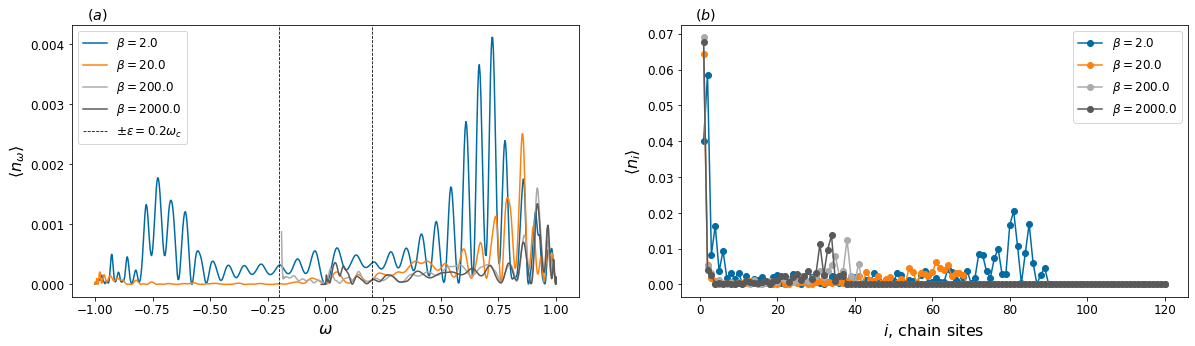

In [8]:
temp(sz_res, beta, "3.0", "constr", True)


In [9]:
def func(x, a, c):
    return a* x+c 

def funcx(x, a, b, c):
    return np.cos(a*x)*np.exp(-b * x)+c


gammaz = np.zeros((len(beta)))
gammax = np.zeros((len(beta)))


def spin(s, save):
    f = pl.figure(figsize=(25,15))
    t = sz_res["2.0/3.0/times"][()]
    step = 1
    gammaz = []
    gammax = []
    for b in beta:
        pl.subplot(2,2,step)
        spz = sz_res[b+"/"+s+"/sz"][()]
        spx = sx_res[b+"/"+s+"/sx"][()]
        pl.plot(t, spz, label=r'$ \langle \sigma_z \rangle $') 
        pl.plot(t, spx, label=r'$ \langle \sigma_x \rangle $') 
        poptz, pcovz = curve_fit(funcx, t, spz, maxfev=3000)
        poptx, pcovx = curve_fit(func, t, spx, maxfev=300000)
 #       pl.plot(t, func(t, *poptz), label='fit: $a_z$=%5.3f, $\Gamma_z$=%5.3f, $c_z$=%5.3f' % tuple(poptz))
        pl.plot(t, func(t, *poptx), label='fit: $a_z$=%5.3f, $b_z$=%5.3f' % tuple(poptx))
        pl.plot(t, funcx(t, *poptz), label='fit: $\omega_x$=%5.3f, $\Gamma_x$=%5.3f, $c_x$=%5.3f' % tuple(poptz))
 #       pl.plot(t, funcx(t, *poptx), label='fit: $\omega_x$=%5.3f, $\Gamma_x$=%5.3f' % tuple(poptx))

        gammaz.append(poptz[1])
        gammax.append(poptx[1])
        pl.xlabel(r'$\omega_c t$', fontsize=16)
        pl.ylabel(r'$\langle \sigma \rangle$', fontsize=16)
        pl.title(r'$\beta = $' + b, fontsize=18)
        pl.legend(fontsize=18)
        pl.grid()
        step+=1
    pl.suptitle(r"$s = $"+s, fontsize=20, x=0.05, y=0.52)
    if save: f.savefig("plots/spin_IBM_s="+s+".pdf", bbox_inches='tight')
    pl.show()
    return (gammaz, gammax)

def mini_spin(resz, resx, ohm, b, save):
    f = pl.figure(figsize=(6,4)) 
    t = resz[b+"/"+ohm+"/times"][()]
    spz = resz[b+"/"+ohm+"/sz"][()]
    spx = resx[b+"/"+ohm+"/sx"][()]
    pl.plot(t, spz, label=r'$ \langle \sigma_z \rangle $') 
    pl.plot(t, spx, label=r'$ \langle \sigma_x \rangle $') 
    poptz, pcovz = curve_fit(funcx, t, spz, maxfev=3000)
    poptx, pcovx = curve_fit(func, t, spx, maxfev=300000000)
#    pl.plot(t, func(t, *poptz), label='fit: $a_z$=%5.3f, $\Gamma_z$=%5.3f, $c_z$=%5.3f' % tuple(poptz))
    pl.plot(t, func(t, *poptx), label='fit: $a_z$=%5.3f, $b_z$=%5.3f' % tuple(poptx))
    pl.plot(t, funcx(t, *poptz), label='fit: $\omega_x$=%5.3f, $\Gamma_x$=%5.3f, $c_x$=%5.3f' % tuple(poptz))
#    pl.plot(t, funcx(t, *poptx), label='fit: $\omega_x$=%5.3f, $\Gamma_x$=%5.3f' % tuple(poptx))
    pl.xlabel(r'$\omega_c t$', fontsize=16)
    pl.ylabel(r'$\langle \sigma \rangle$', fontsize=16)
    pl.legend(fontsize=15)
    #pl.title(tit, x=0.05)
    pl.grid()
    if save: f.savefig("plots/spin_IBM_s="+ohm+"_beta="+b+".pdf", bbox_inches='tight')
    else: pl.suptitle(r"$s = $"+ohm+r"$,\quad \beta = $"+b+", weak", fontsize=20)
    return (poptz[1], poptx[1])


/home/berkane/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/berkane/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


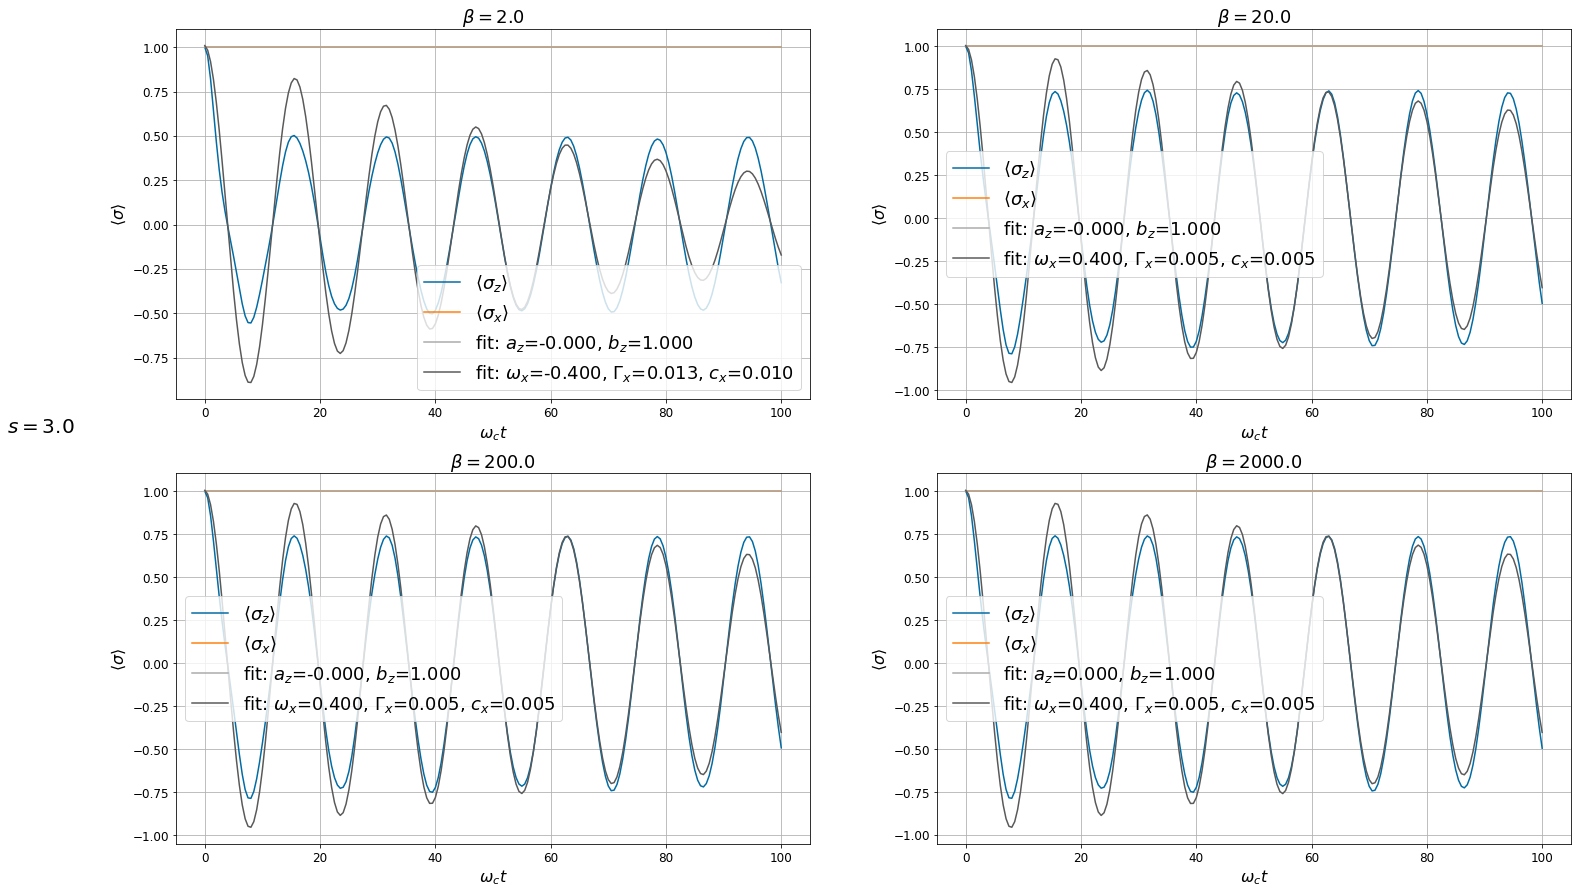

([0.013044369258026324,
  0.004952850728884564,
  0.004909010472163967,
  0.004886216763098351],
 [1.0000000001090965,
  1.0000000001795681,
  1.0000000009070626,
  0.9999999981298848])

In [10]:
spin("3.0", False)

In [11]:
def single_comparison(gam, s):
    pl.figure(figsize=(5, 3))
    marks = ["d","p","*","<","3","o","v","2",">","1"]
    pl.ylabel(r'$\Gamma$', fontsize=16)
    gf = [gam[i][1]-0.5*gam[i][0] for i in range(len(gam))]
    gz = [gam[i][0] for i in range(len(gam))]
    gx = [gam[i][1] for i in range(len(gam))]
    pl.plot(beta, gz, '-d', label=r'$\Gamma_z $', markersize=10)
    pl.plot(beta, gx, '-p', label=r'$\Gamma_x $', markersize=10)
    pl.plot(beta, gf, '-*', label=r'$\Gamma_\phi $', markersize=10)
    pl.legend(loc="best")
    pl.xlabel(r'$\beta$', fontsize=16)
    pl.title(r"$s = $"+ s, fontsize=18)
    pl.grid()
    pl.show()

/home/berkane/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/berkane/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


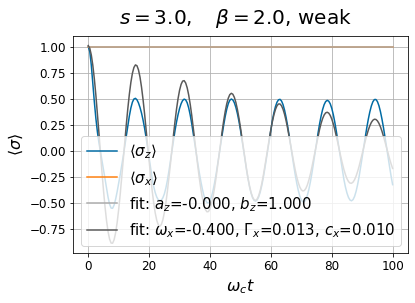

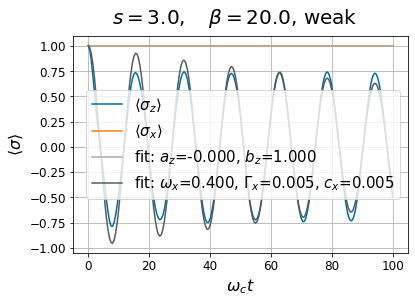

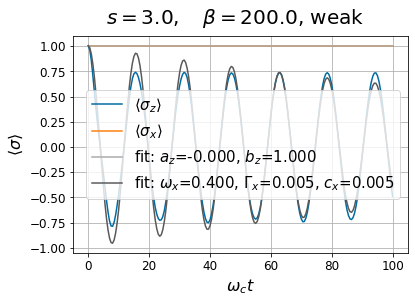

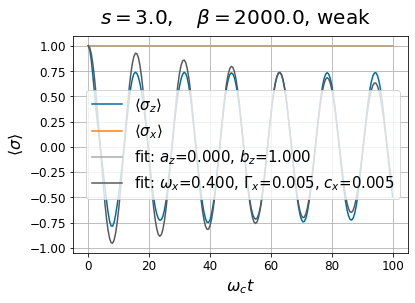

In [12]:
gams3=[]
for b in beta:
    gams3.append(mini_spin(sz_res, sx_res, "3.0", b, False))
  

/home/berkane/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(0.013044369258026324, 1.0000000001090965)

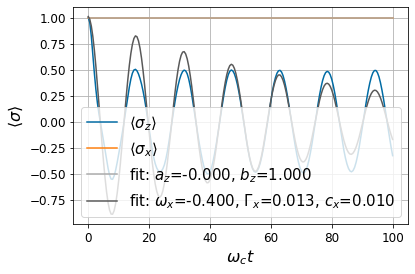

In [13]:
mini_spin(sz_res, sx_res, "3.0", "2.0", True)

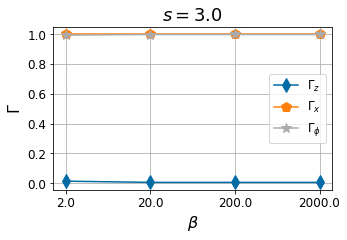

In [14]:
single_comparison(gams3, "3.0")


In [15]:
def bonds(beta, res, name, save):
    if save: f = pl.figure(figsize=(20.625,5))
    else: f = pl.figure(figsize=(30,9))
    
    step = 1    
    for ohm in s:
        pl.subplot(2,len(s),step)
        
        sites = [i for i in range(0,N+2)]
        for t in range(1, len(tem)+1):
            pl.plot(sites, res[beta+"/"+ohm+"/bond_dims_"+str(t)][()], label=r"$\omega_c t =$"+str(tem[t-1]))
        step += 1
        pl.legend(loc="best",prop={'size': 10})
        #pl.xlabel('i, chain sites', fontsize=16)
        if step==2: pl.ylabel('$\chi$', fontsize=16)
        pl.title("$s = $"+ ohm)
        
        pl.subplot(2,len(s),step+len(s)-1)
        pl.imshow(res[beta+"/"+ohm+"/bond_dims"], cmap='hot', interpolation='nearest', vmin=0, vmax=100, extent=[1, 120, 100, 1])
        pl.xlabel('i, chain sites', fontsize=16)
        if step==2: pl.ylabel('$t$', fontsize=16)
        #pl.colorbar()
        
    if name=="sx": 
        if save: f.savefig("plots/bonds_IBM_sx_beta="+beta+".pdf", bbox_inches='tight')
        else: pl.suptitle("Bond dimensions, "+r"$ \quad \beta = $"+beta+r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    else: 
        if save: f.savefig("plots/bonds_IBM_sz_beta="+beta+".pdf", bbox_inches='tight')
        else: pl.suptitle("Bond dimensions, "+r"$ \quad \beta = $"+beta + r"$\quad |\psi_0 \rangle = |1 \rangle$ ", fontsize=18)
pl.show()
    

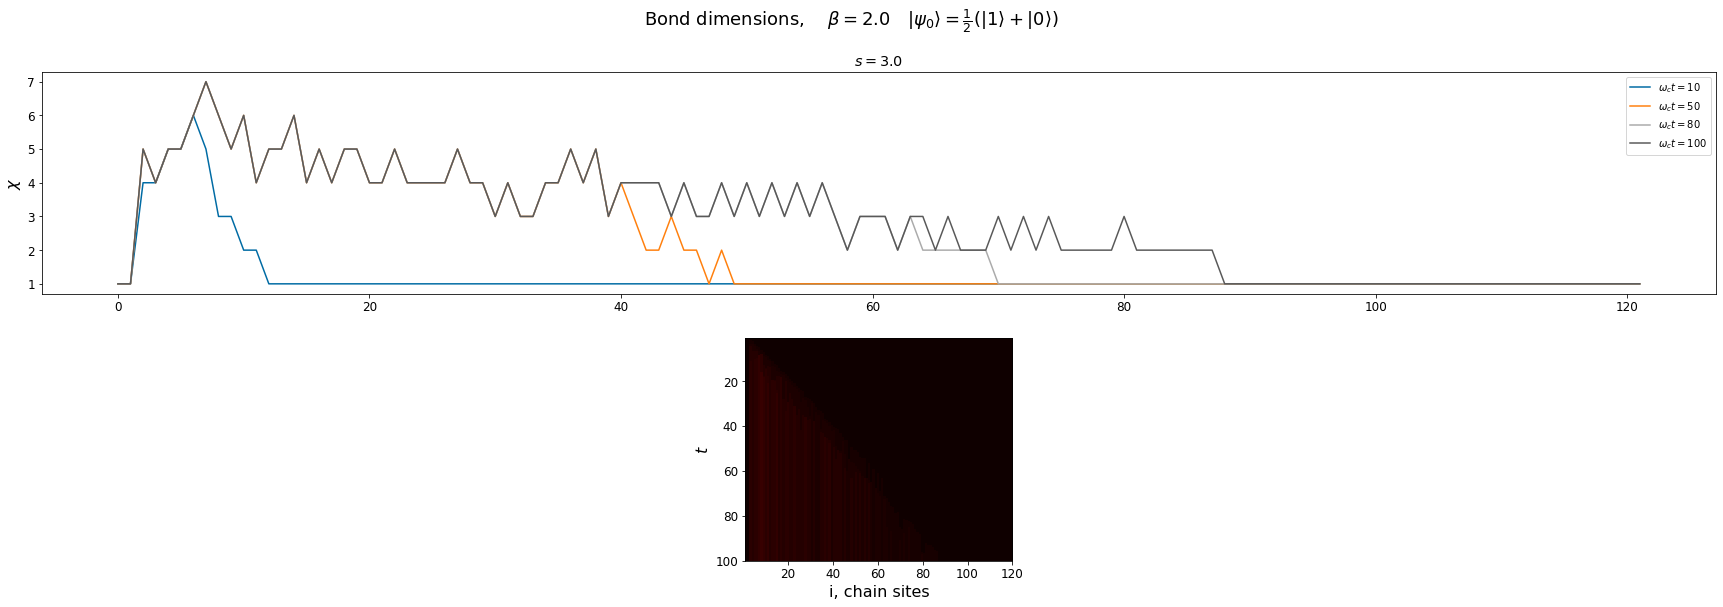

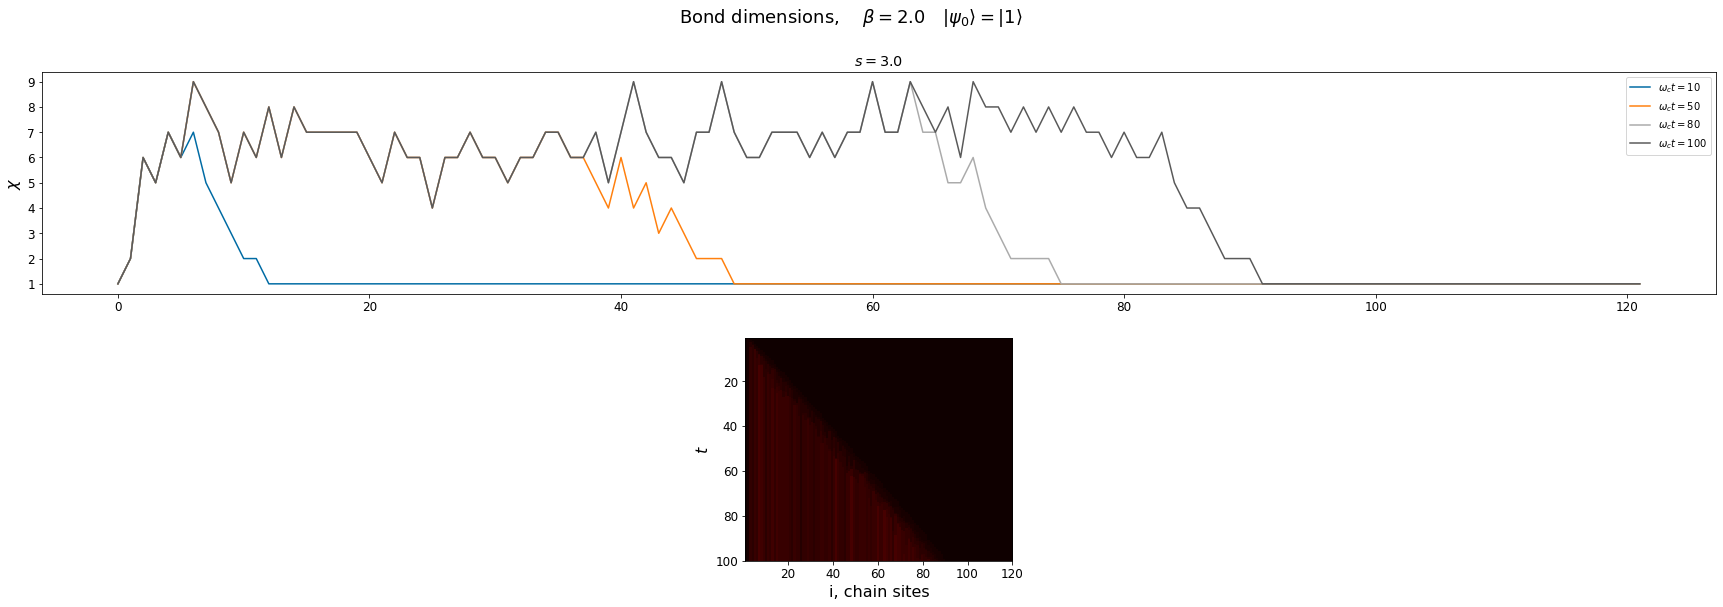

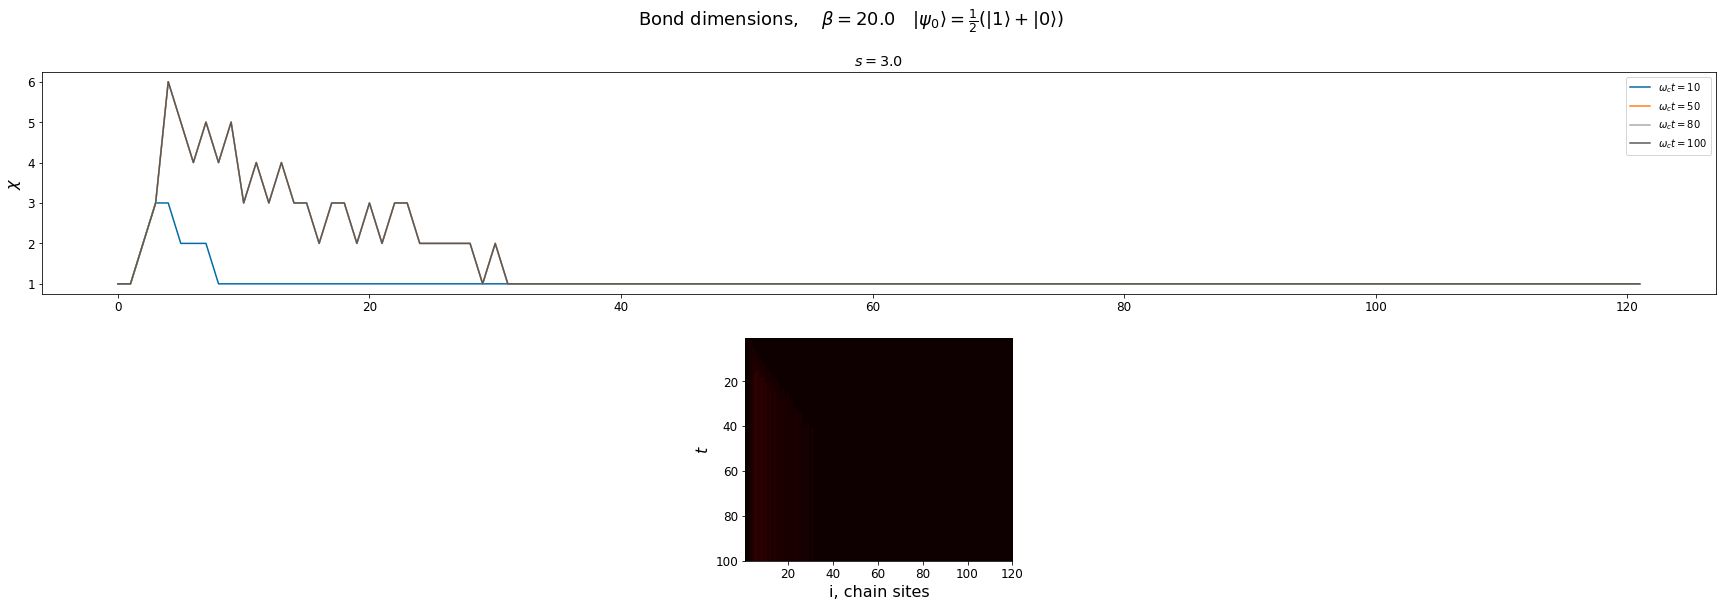

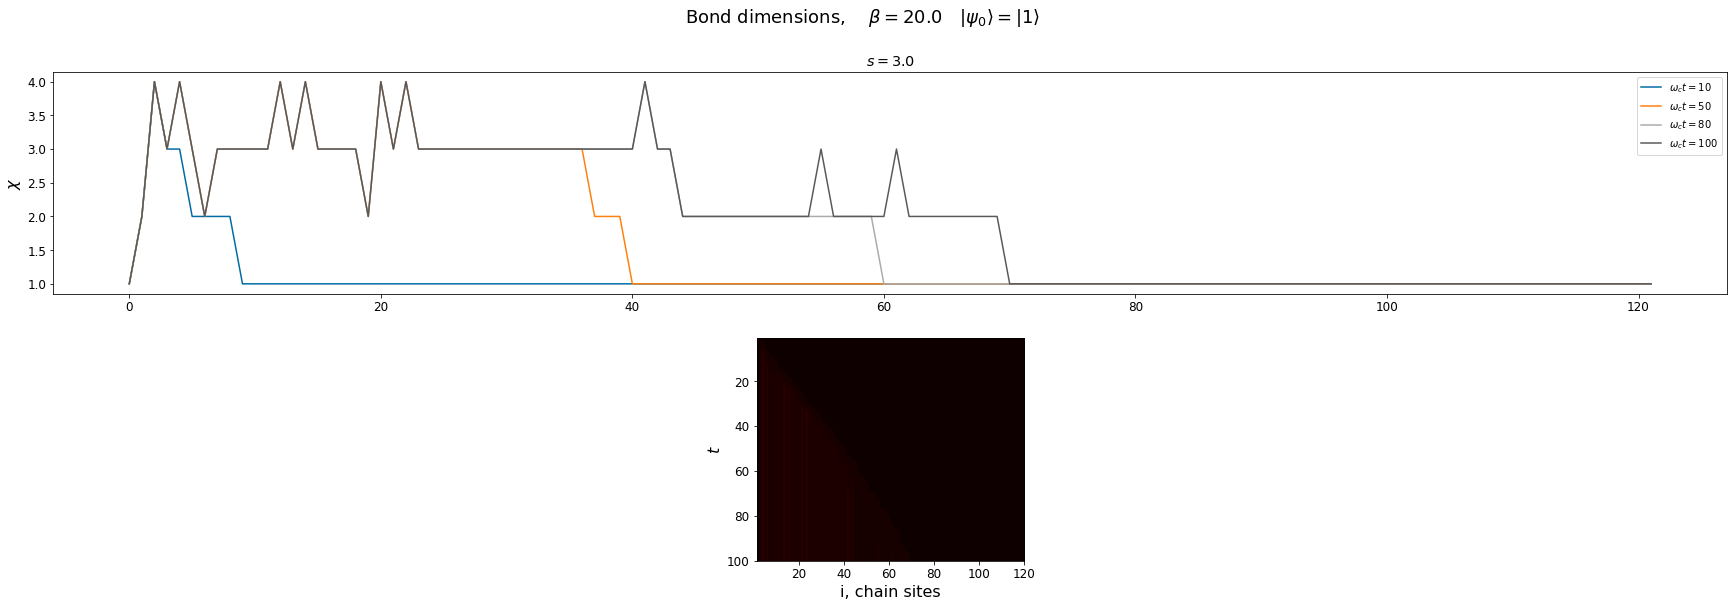

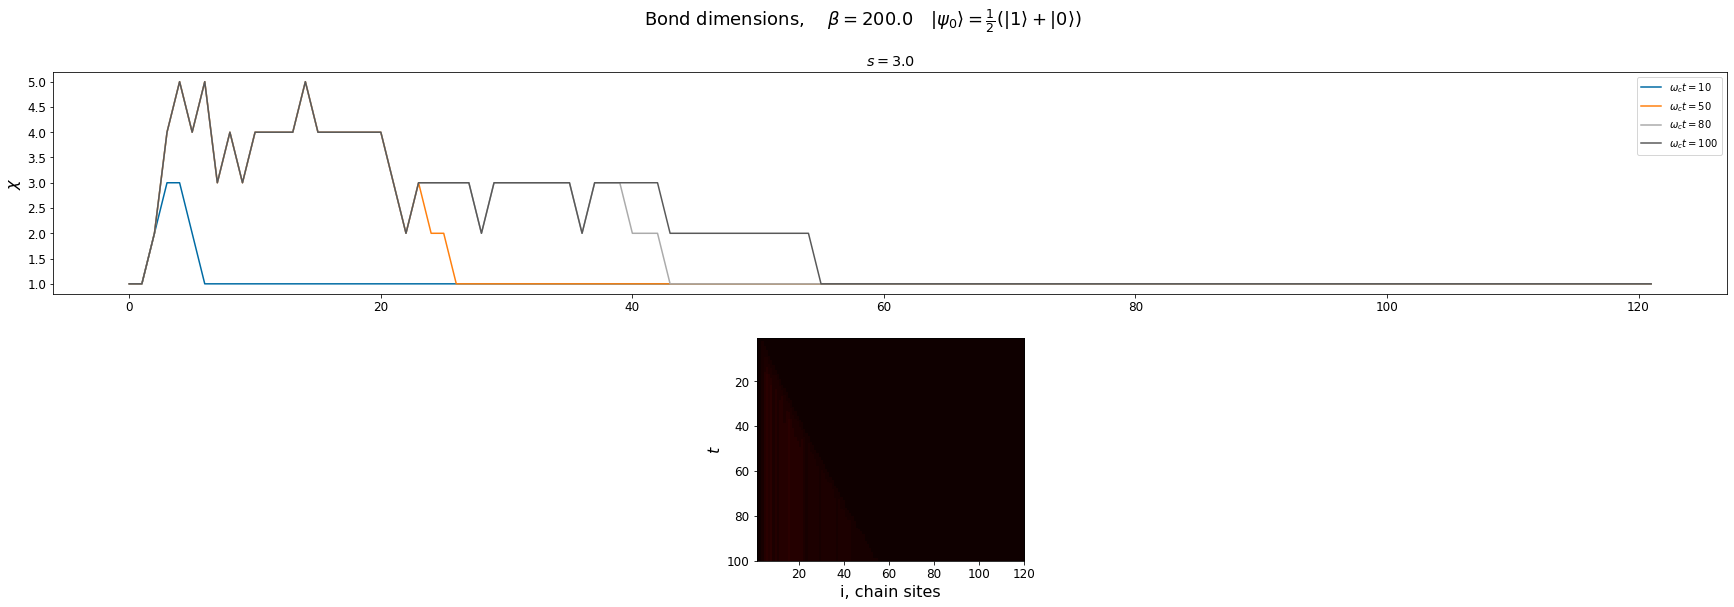

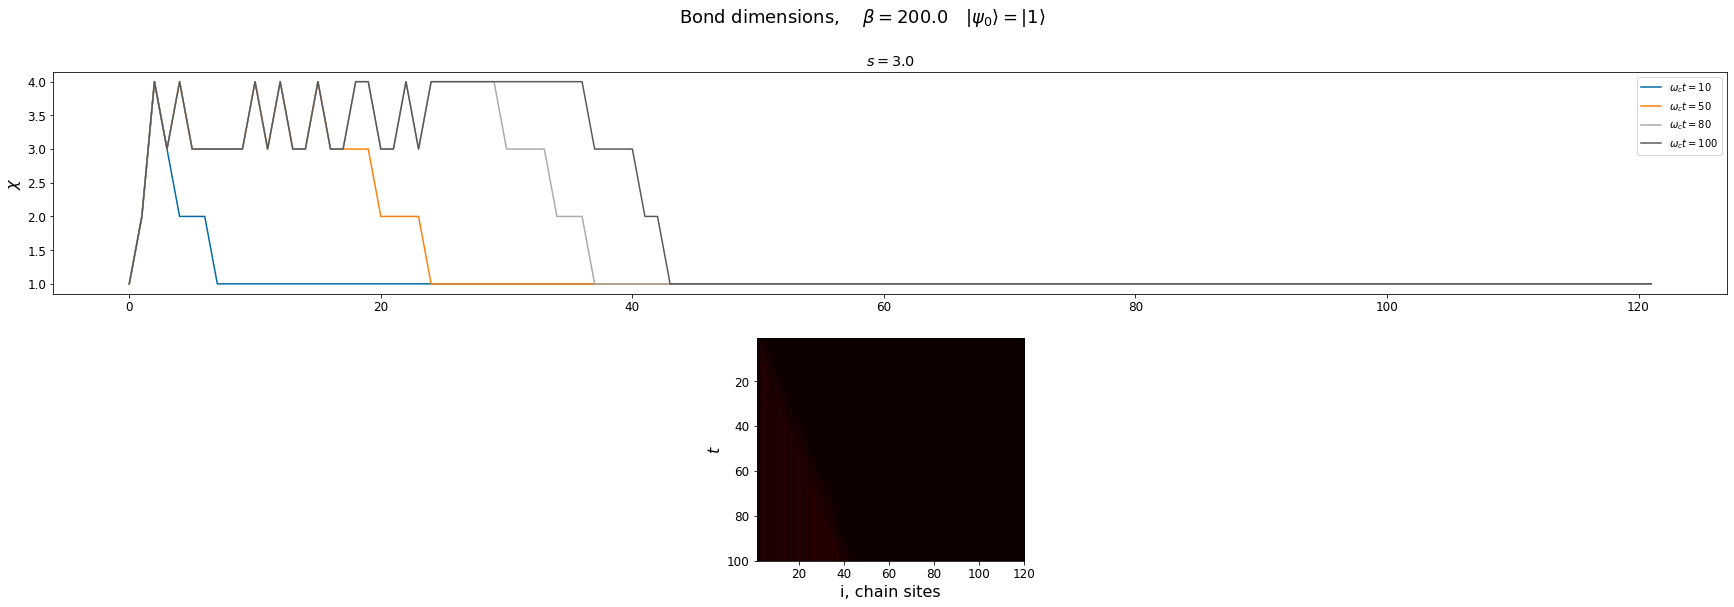

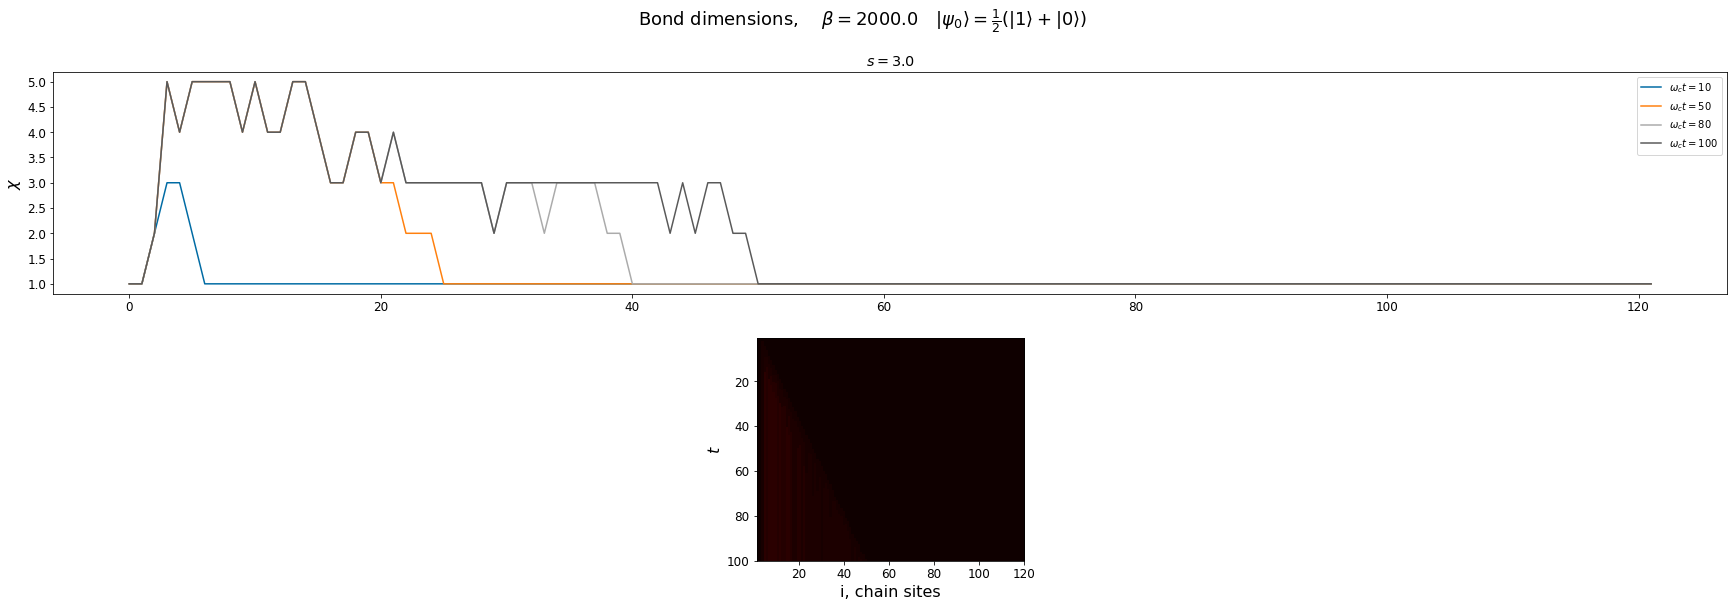

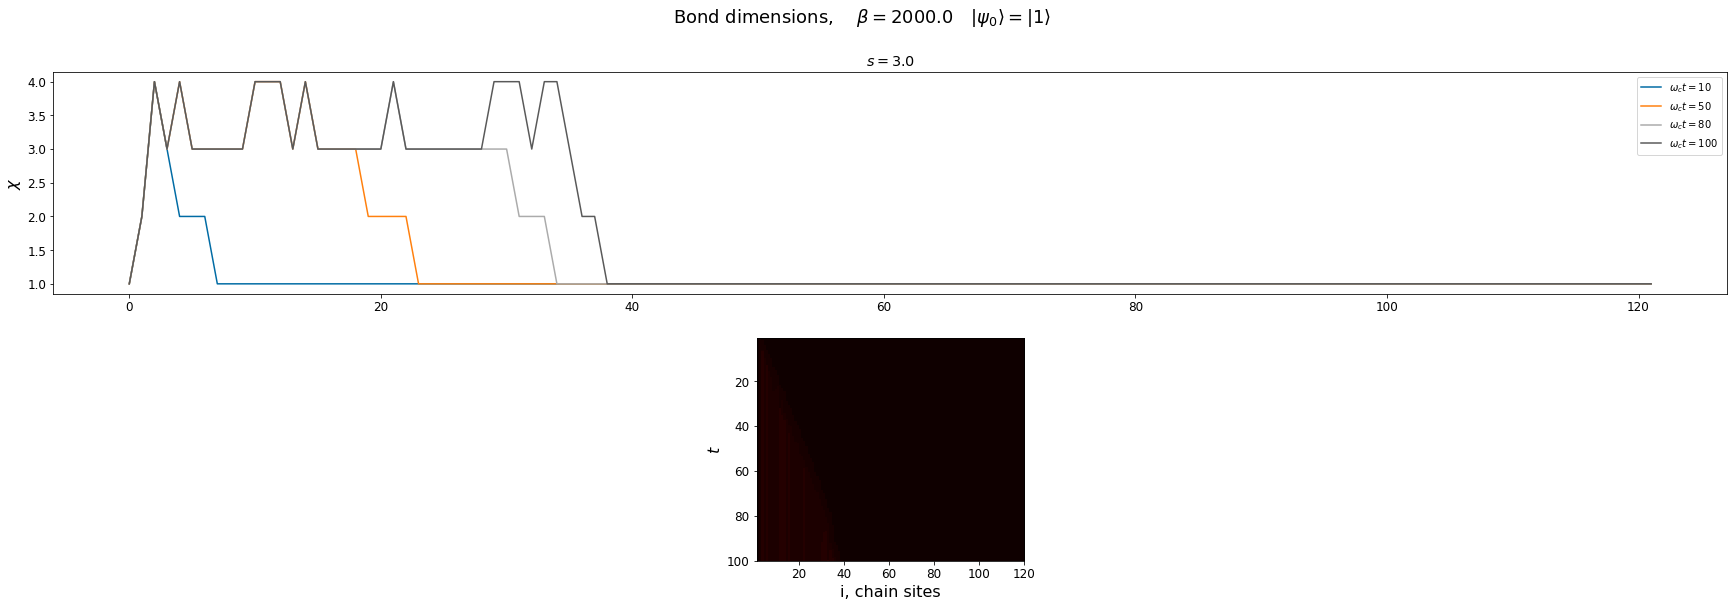

In [16]:
for b in beta:
    bonds(b, sx_res, "sx", False)
    bonds(b, sz_res, "sz", False)

In [17]:
def chain_coeffs_one(beta, res, save):
    f = pl.figure(figsize=(12,4)) 
    pl.subplot(1,2,1)
    if save!=True: pl.title("energy")
    pl.ylabel(r'$e$', fontsize=16)
    pl.xlabel('i, chain sites', fontsize=16)
    for ohm in s:
        sites = [i for i in range(0,N)]
        pl.plot(sites, res[beta+"/"+ohm+"/coeff_e"][()][:N], label = "$s = $"+ ohm)
    pl.legend(loc="best")

            
    pl.subplot(1,2,2)
    if save!=True: pl.title("hopping")
    pl.ylabel('$t$', fontsize=16)
    pl.xlabel('i, chain sites', fontsize=16)
    for ohm in s:    
        sites = [i for i in range(0,N-1)]
        pl.plot(sites, res[beta+"/"+ohm+"/coeff_t"][()][:N-1], label = "$s = $"+ ohm)
    pl.legend(loc="best")
    if save: 
        pl.suptitle(r"$\beta = $"+beta)
        f.savefig("plots/chain_coeffs_beta="+beta+".pdf", bbox_inches='tight')
    else: pl.suptitle("Chain coefficients, "+r"$ \quad \beta = $"+beta, fontsize=18)    
    pl.show()

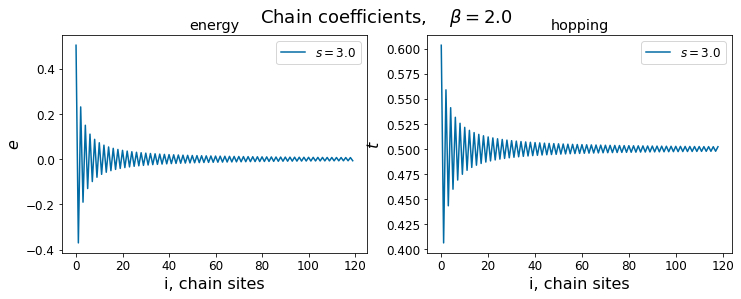

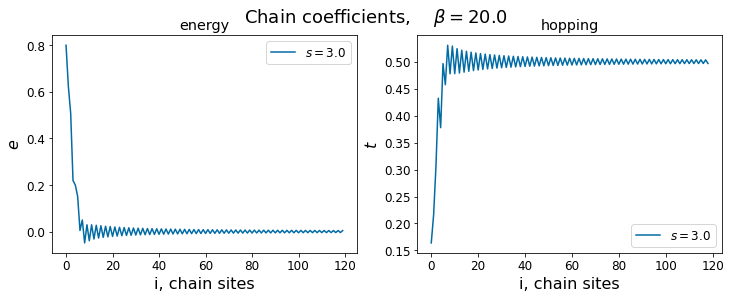

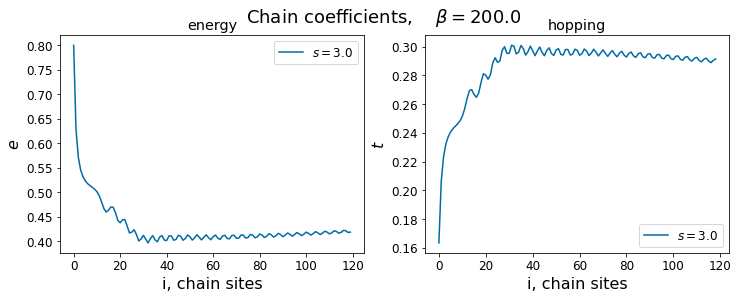

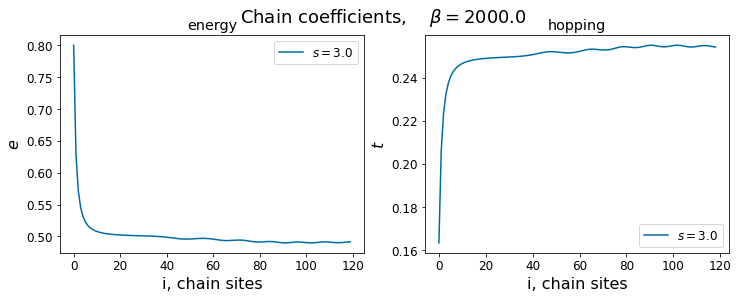

In [18]:
for b in beta:
    chain_coeffs_one(b, sx_res, False)

# Analytical results

Given the following Hamiltonian (with the thermalized spectral density function $J$):
$$
\hat H = \frac{\Delta}{2} \hat \sigma_x + \int_{-\infty}^{+\infty} d\omega \omega \hat b_\omega^\dagger \hat b_\omega + \frac{\hat \sigma_x}{2} \otimes \int_{-\infty}^{+\infty} d\omega \sqrt{J(\omega, \beta)}(\hat b_\omega^\dagger + \hat b_\omega)
$$
It is possible to calculate the theoretical results for the IBM:
$$
\frac{d \langle \hat b_\omega \rangle}{dt} = -i \langle[ \hat b_\omega, \hat H] \rangle = - i \omega \langle\hat b_\omega \rangle - i \frac{\langle \hat \sigma_x \rangle}{2} \sqrt{J(\omega, \beta)}, \\
\frac{d \langle \hat n_\omega \rangle}{dt} = -i \langle[\hat b_\omega^\dagger \hat b_\omega, \hat H] \rangle= 2 \frac{|J(\omega,\beta)|}{\omega} \sin(\omega t)
$$

NB INTEGRALE!!!!!!!!

when the initial state is one of the eigenstates of $\hat \sigma_x$, its mean value is $\pm 1$.

In [19]:
list(sx_ana["2.0/0.5"].keys())
list(sz_res["20.0"].keys())[0:3]

['0.5', '1.0', '2.0']

In [20]:
def analytical(res, b, s, save):
    om=res[b+"/"+s+"/omega10.0"][()]
    occup=[res[b+"/"+s+"/cumul_"+i][()] for i in times]    
    
    if save: f = pl.figure(figsize=(20.625,5))
    else: f  = pl.figure(figsize=(20,5))

    ax = pl.subplot(1, 2, 1)
    for t in range(len(times)):
        pl.plot(om[0:699], occup[t], label=r'$\omega_c t = $'+times[t])
    pl.axvline(x=0.2, color='black', linewidth=0.8,linestyle='--', label = r'$\pm \epsilon = 0.2 \omega_c$')
    pl.axvline(x=-0.2, color='black', linewidth=0.8,linestyle='--')
    pl.xlabel(r'$\omega$', fontsize=16)
    pl.ylabel(r'$\langle n_\omega \rangle$', fontsize=16)
    pl.legend()
    #ax.yaxis.set_label_coords(-.05, 1.)
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    else: pl.title(r"$(a)$", x=0.05)
        
        
    pl.subplot(1, 2, 2) 
    tim = [res[b+"/"+s+"/times_"+i][()] for i in times]
    spz = [res[b+"/"+s+"/sz_"+i][()] for i in times]
    for t in range(len(times)):
        pl.plot(tim[t], spz[t], label=r'$\omega_c t = $'+times[t]) 
    pl.xlabel(r'$\omega_c t$', fontsize=16)
    pl.ylabel(r'$\langle \sigma_z \rangle$', fontsize=16)
    pl.legend()
    pl.grid()
    
    if save: 
        pl.title(r'$(b)$', x=0.05)
        f.savefig("plots/anlytical_sz_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
    else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    pl.show()
    
def analytical_occ(res, b, s, save):
    om=res[b+"/"+s+"/omega10.0"][()]
    occup=[res[b+"/"+s+"/cumul_"+i][()] for i in times]    
    
    if save: f = pl.figure(figsize=(8,4))
    for t in range(len(times)):
        pl.plot(om[0:699], occup[t], label=r'$\omega_c t = $'+times[t])
    pl.axvline(x=0.2, color='black', linewidth=0.8,linestyle='--', label = r'$\pm \epsilon = 0.2 \omega_c$')
    pl.axvline(x=-0.2, color='black', linewidth=0.8,linestyle='--')
    pl.xlabel(r'$\omega$', fontsize=16)
    pl.ylabel(r'$\langle n_\omega \rangle$', fontsize=16)
    pl.legend()
    #ax.yaxis.set_label_coords(-.05, 1.)
    if save!=True: 
        pl.grid()
        pl.title(r'$s = $' + s, fontsize=18)
    #else: pl.title(r"$(a)$", x=0.05)   

    if save: 
     #   pl.title(r'$(b)$', x=0.05)
        f.savefig("plots/anlytical_occ_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
    else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    pl.show()

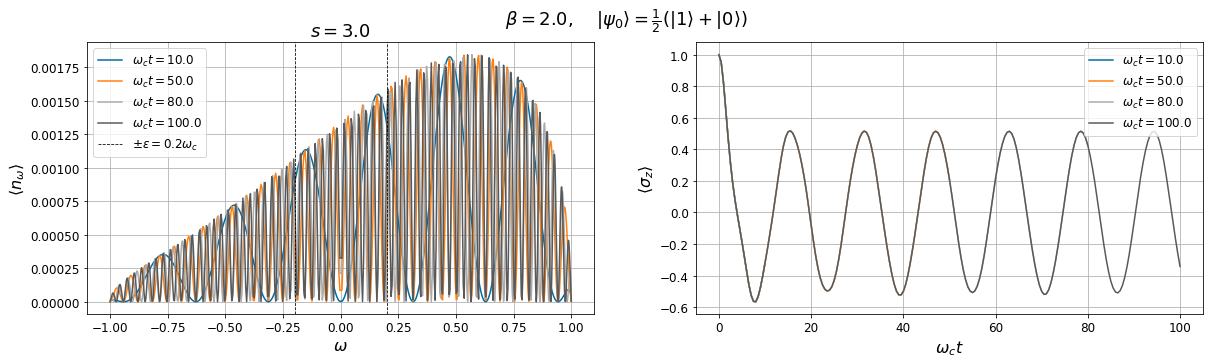

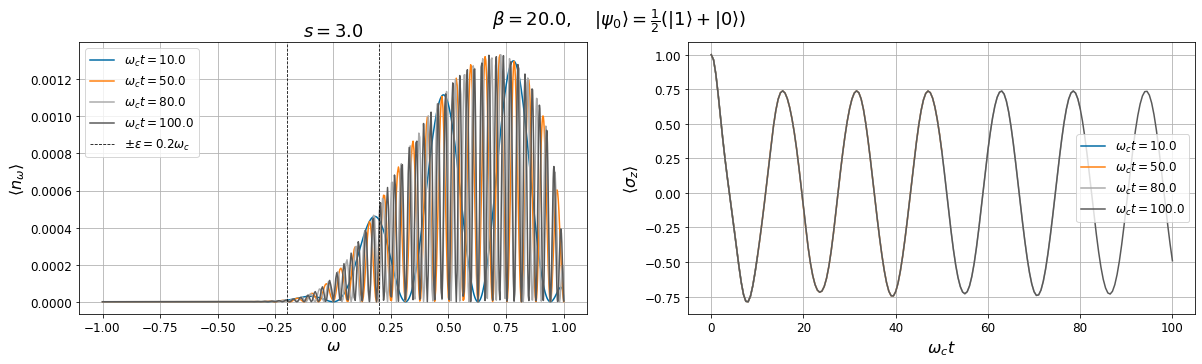

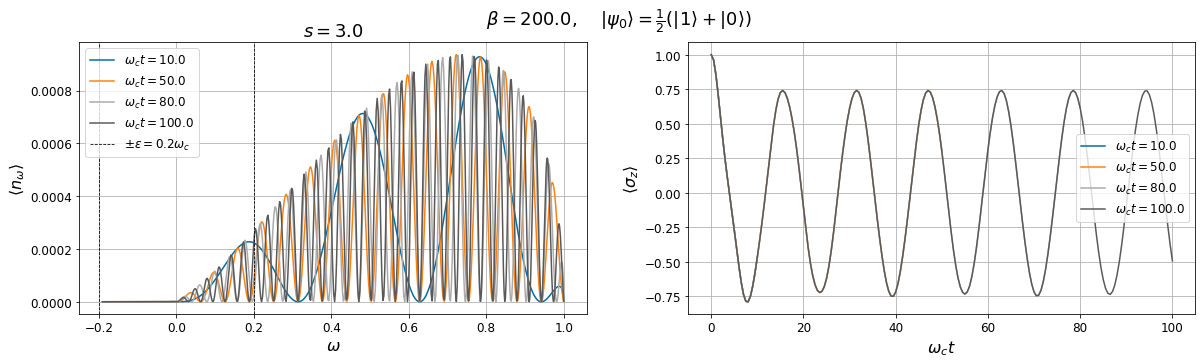

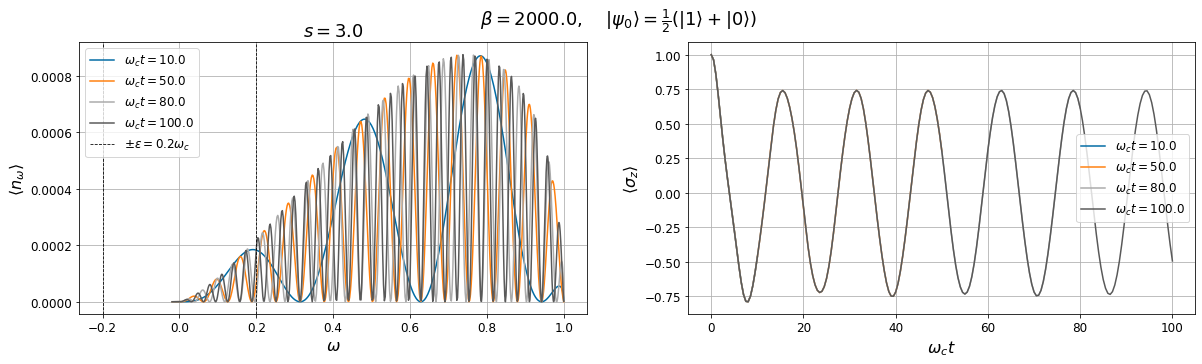

In [21]:
for b in beta:
    analytical(sx_ana, b, "3.0", False)
    

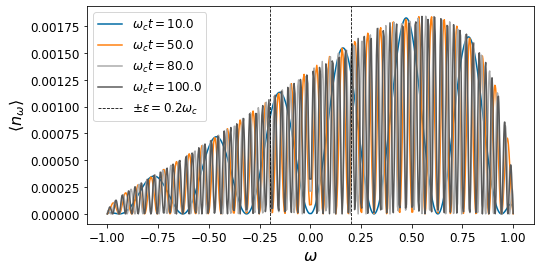

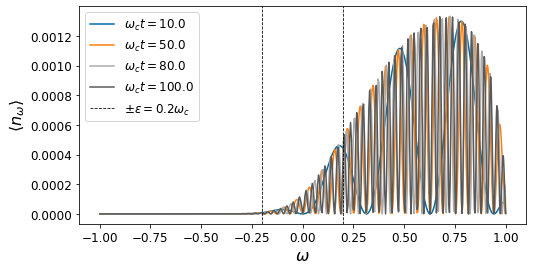

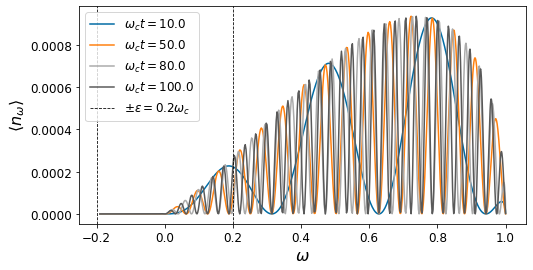

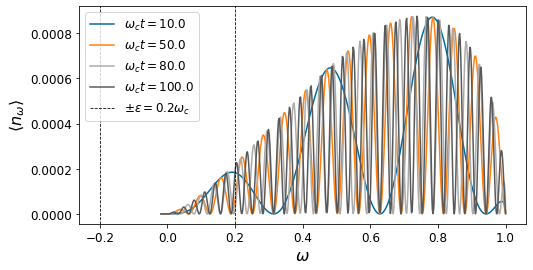

In [22]:
for b in beta:
    analytical_occ(sx_ana, b, "3.0", True)

In [23]:
def comparison(res_num, res_ana, b, s, save):
    tim_ana = res_ana[b+"/"+s+"/times_100.0"][()]
    tim_num = res_num[b+"/"+s+"/times"][()]

    sz_ana = res_ana[b+"/"+s+"/sz_100.0"][()]    
    sz_num = res_num[b+"/"+s+"/sz"][()]   
    
    if save: f = pl.figure(figsize=(6,4))
    
    pl.plot(tim_ana, sz_ana, label="analytical") 
    pl.plot(tim_num, sz_num,'*', label="numerical", markevery=3) 

    pl.xlabel(r'$\omega_c t$', fontsize=16)
    pl.ylabel(r'$\langle \sigma_z \rangle$', fontsize=16)
    pl.legend()
    pl.grid()
    
    if save: 
        pl.title(r'$\beta = $' + b)
        f.savefig("plots/anlytical_sz_s="+s+"_beta="+b+".pdf", bbox_inches='tight')
    #else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    pl.show()
        

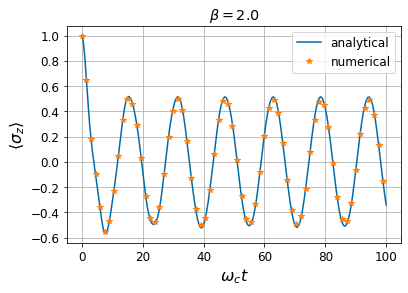

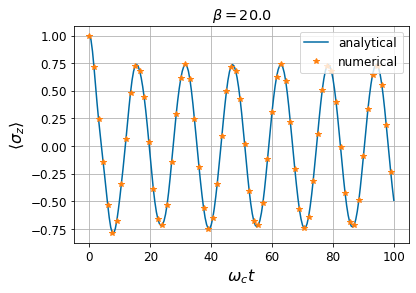

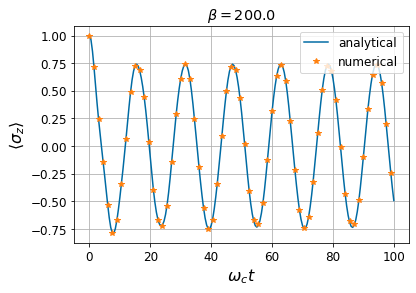

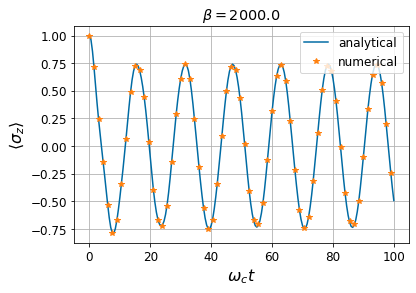

In [24]:
for b in beta:
    comparison(sz_res, sx_ana, b, "3.0", True)

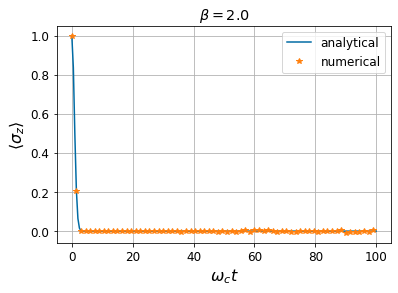

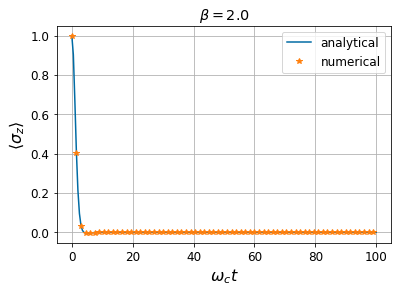

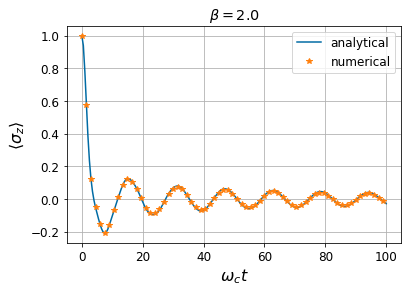

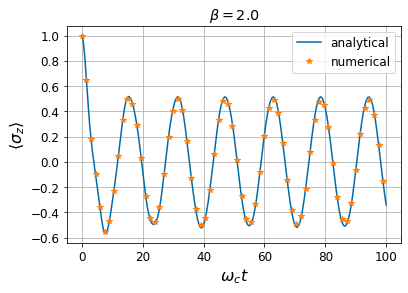

In [25]:
for s in sss:
    comparison(sz_res, sx_ana, "2.0", s, True)

In [26]:
def compa(res_num, res_ana, b, save):   
    f = pl.figure(figsize=(20,3))
    step = 1    
    for ohm in sss:
        pl.subplot(1,len(sss),step)
        tim_ana = res_ana[b+"/"+ohm+"/times_100.0"][()]
        tim_num = res_num[b+"/"+ohm+"/times"][()]
        sz_ana = res_ana[b+"/"+ohm+"/sz_100.0"][()]    
        sz_num = res_num[b+"/"+ohm+"/sz"][()]   

        pl.plot(tim_ana, sz_ana, label="analytical") 
        pl.plot(tim_num, sz_num,'*', label="numerical", markevery=4) 

        pl.xlabel(r'$\omega_c t$', fontsize=16)
        #pl.ylabel(r'$\langle \sigma_z \rangle$', fontsize=16)
        pl.legend()
        pl.grid()
        if step==1: pl.ylabel(r'$\langle \sigma_z \rangle$', fontsize=16)
        step += 1
        pl.title("$s = $"+ ohm)
    if save: 
       # pl.title(r'$\beta = $' + b)
        f.savefig("plots/anlytical_szs_beta="+b+".pdf", bbox_inches='tight')
    #else: pl.suptitle(r'$\beta = $' + b+", " + r"$ \quad | \psi_0 \rangle = \frac{1}{2}(|1 \rangle + |0 \rangle)$ ", fontsize=18)
    pl.show()
        

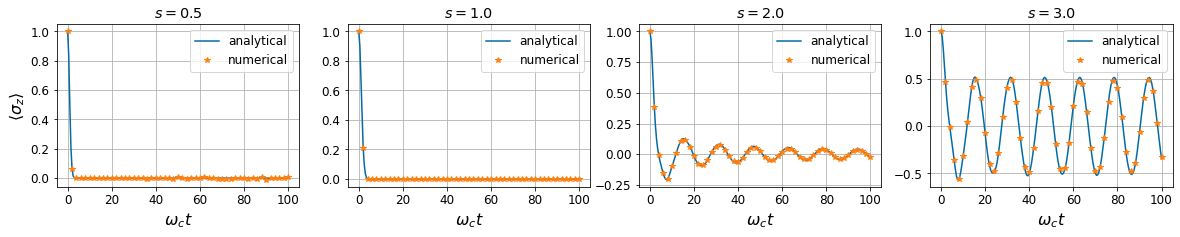

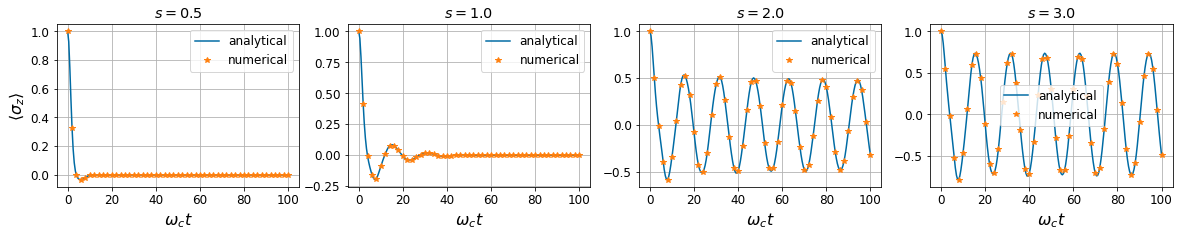

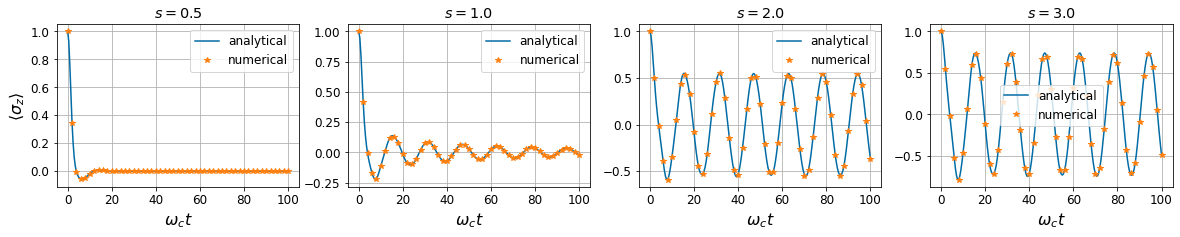

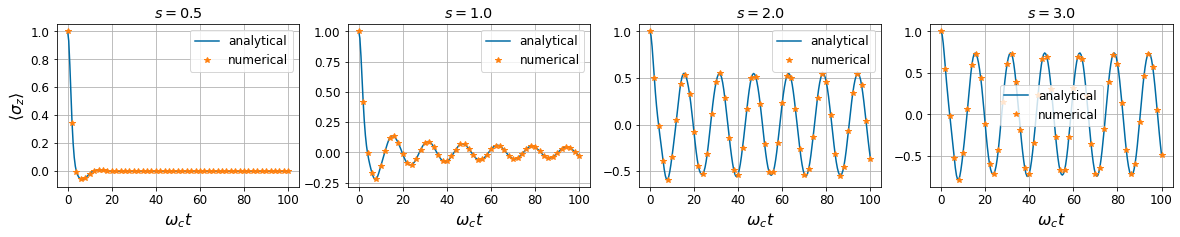

In [27]:
for b in beta:    
    compa(sz_res, sx_ana, b, True)